## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a numeric outcome, while classification predicts a categorical outcome

2. A cross-tabulation of predicted and actual categorical variables. It helps us understand the accuracy of these predictions

3. It helps us understand how far our predictions were from the true values

4. Overfitting having too large a k and your model is too complex to reliably explain y. Underfitting is when the model is too simple to reliably explain y

5. Training/test sets allow us to create a model, test its accuracy, and adjust accordingly, and choosing k by lowest SSE allows us to choose optimal k for highest accuracy

6. Prediction gives us the most likely outcome, which is our best guess but may not actually be all that probable. Prob dist gives us a number of probs that give us an idea of what it could be, but no clear answer as to what it most likely will be

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [15]:
file_path = r"USA_cars_datasets.csv"
df = pd.read_csv(file_path)


In [16]:
df=df[["price", "year", "mileage"]]
print(df.head())
print(df.shape)
df.isna().any()
#There aren't any NAs

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


,0
price,False
year,False
mileage,False


In [17]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

cols = ['year', 'mileage']
df[cols] = df[cols].apply(maxmin)

In [18]:
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

In [19]:
def statics(k=3,data=df): # This function replicates our previous work, with k as an input
    y = df['price'] # Create target variable vector
    X = df.loc[:,['mileage','year']] # Create feature matrix
    # Normalize:
    X = X.apply(maxmin)
    model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100 # Coarseness of x variable
    N_y = 100 # Coarseness of y variable
    total = N_x*N_y # Total number of points to plot
    grid_x = np.linspace(0,1,N_x) # Create a grid of x values
    grid_y = np.linspace(0,1,N_y) # Create a grid of y values
    xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
    X = xs.reshape(total) # Turns pairs into vectors
    Y = ys.reshape(total) # Turns pairs into vectors
    x_hat = pd.DataFrame({'mileage':X,'year':Y}) # Create a dataframe of points to plot
    y_hat = fitted_model.predict(x_hat) # Fit the model to the points
    x_hat['price'] = y_hat # Add new variable to the dataframe
    # Create seaborn plot:
    this_plot = sns.scatterplot(data=x_hat,x='mileage',y='year',
                                hue='price',palette='crest',linewidth=0)
    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

None


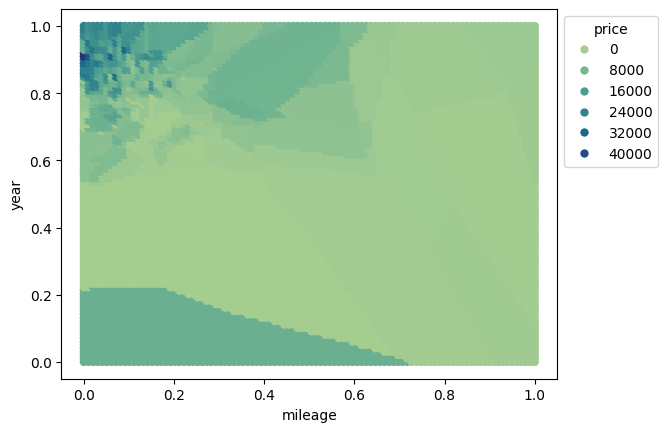

In [20]:
print(statics(3))

None


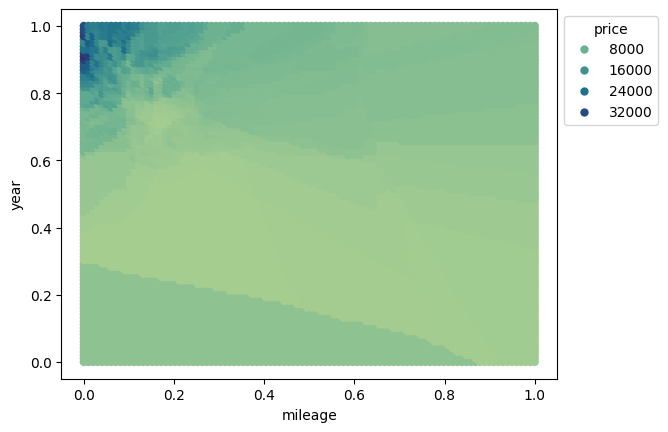

In [21]:
print(statics(10))

None


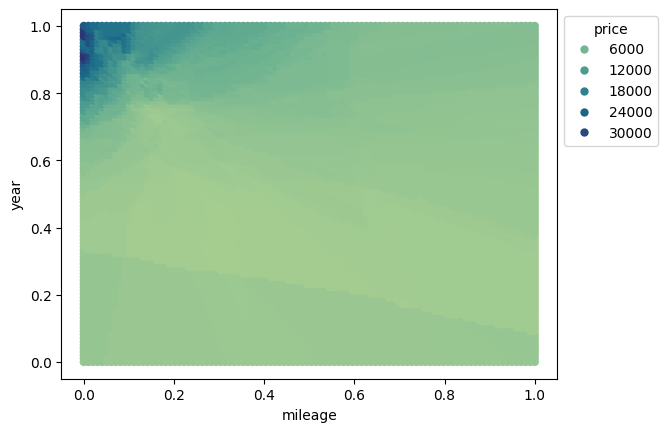

In [22]:
print(statics(25))

None


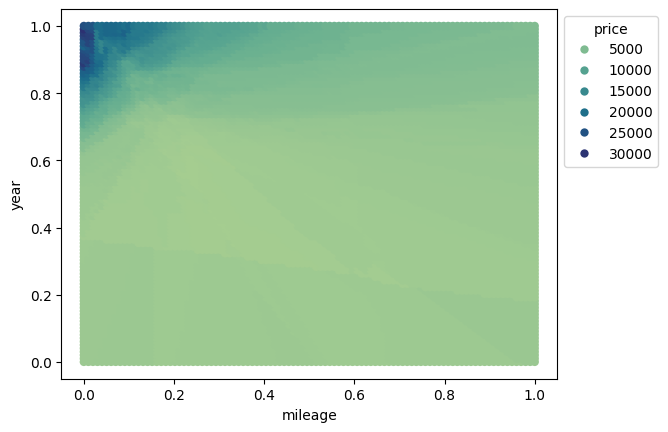

In [23]:
print(statics(50))

None


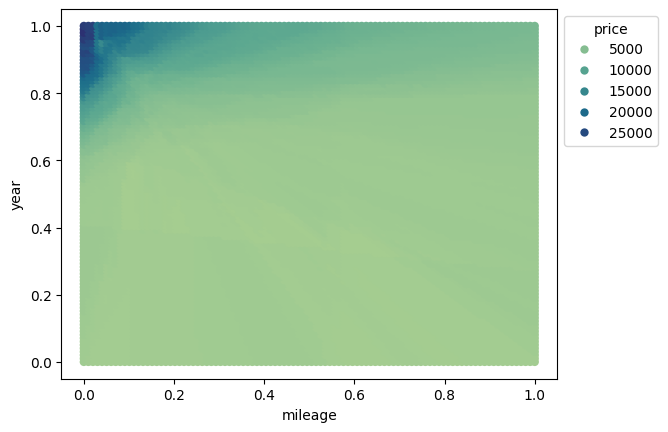

In [24]:
print(statics(100))

None


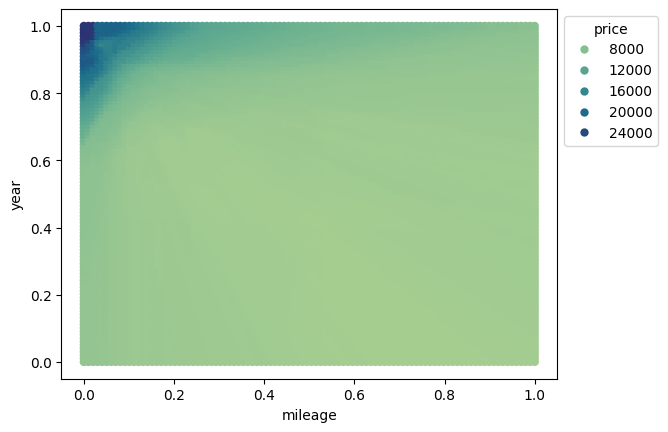

In [25]:
print(statics(300))

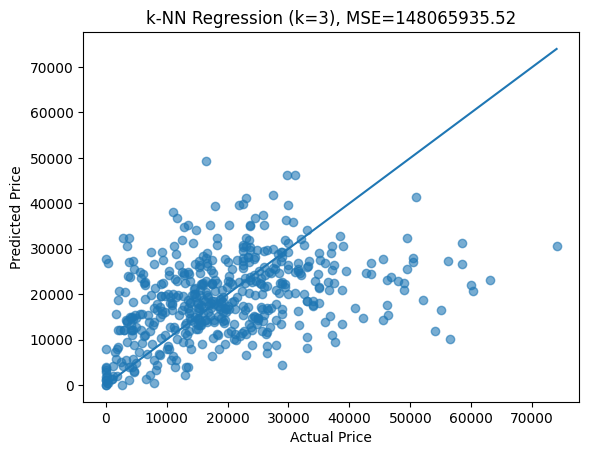

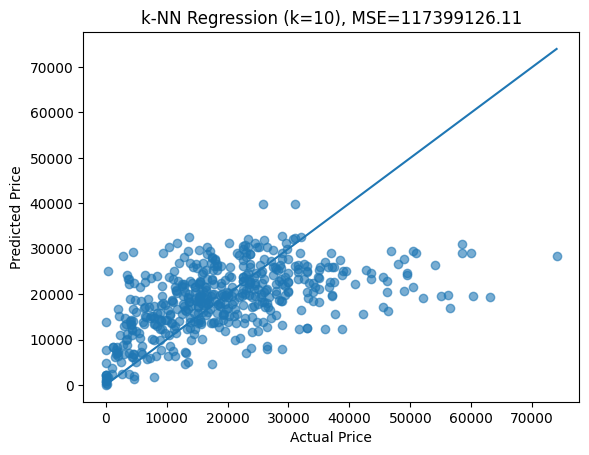

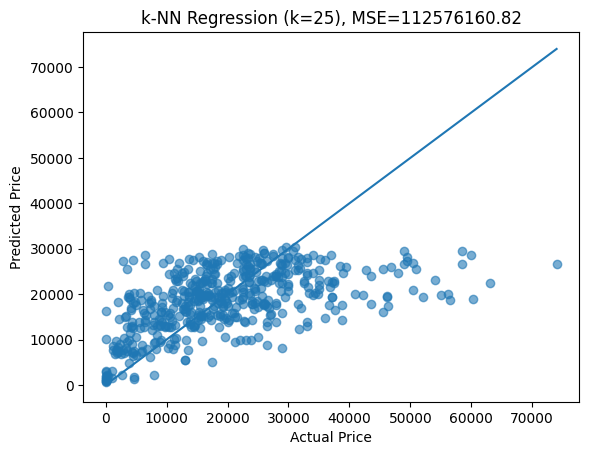

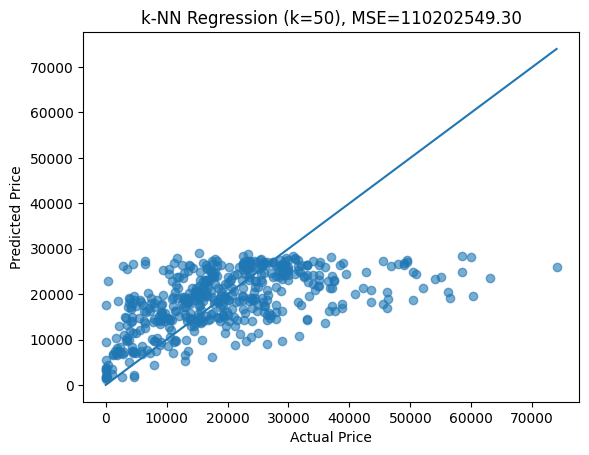

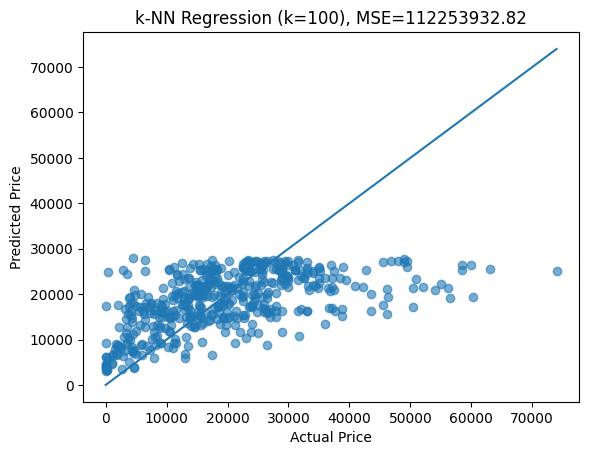

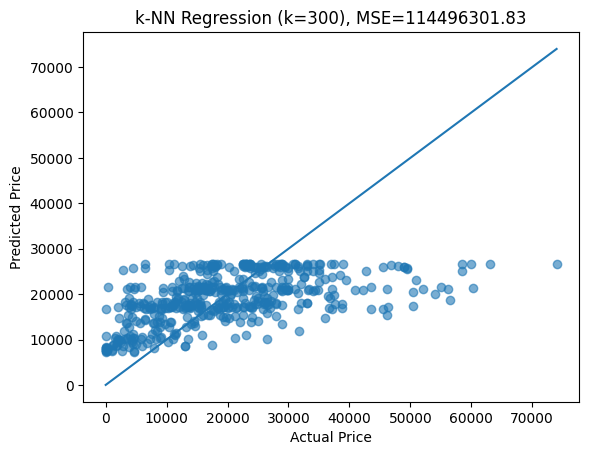

In [26]:
X_train = train_df[['year', 'mileage']]
y_train = train_df['price']

X_test = test_df[['year', 'mileage']]
y_test = test_df['price']

ks = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()])
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k}), MSE={mse:.2f}")
    plt.show()

4-6: As we increase k, the data gets less variable and seems to hit a ceiling around 30000 predicted price. Also, MSE is lowest for k=50, therefore optimal k is k=50. As k got too big, the model got too copmlex and approached the mean as prediction (overfitted). For too low a k, the model was too simple to be a good predictor of k, and there was high variance in predictions.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving zoo.csv to zoo.csv


In [6]:
file_path = r"zoo.csv"
df2 = pd.read_csv(file_path)

In [10]:
df2['class'].value_counts().sort_index()
#Class 1 is largest at 41, class 5 is smallest at 4
feature_variation = df2.drop(columns=['animal', 'class']).mean()
feature_variation.sort_values()
#There is a lot more variation in features that don't appear as often like venemous or domestic, but less in things like breathes or bacjbone. I think the rarer features will be better at predicting class.

,0
venomous,0.079208
domestic,0.128713
fins,0.168317
feathers,0.198020
airborne,0.237624
aquatic,0.356436
milk,0.405941
hair,0.425743
catsize,0.435644
predator,0.554455


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [44]:
X = df2.drop(columns=['animal', 'class'])
X_scaled = X.apply(maxmin)
y = df2['class']
ks = [3, 5, 8, 12, 15, 20, 25, 30]
results = {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[k] = acc

    print(f"k={k}: Accuracy = {acc:.3f}")

k=3: Accuracy = 0.018
k=5: Accuracy = 0.020
k=8: Accuracy = 0.016
k=12: Accuracy = 0.024
k=15: Accuracy = 0.026
k=20: Accuracy = 0.026
k=25: Accuracy = 0.034
k=30: Accuracy = 0.034


I think k=5 is most accurate because it doesn't overfit the data but still has relatively high accuracy

In [46]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_test_labels = y_test.astype(int)
y_pred_labels = pd.Series(y_pred).astype(int)
conf_df = pd.crosstab(
    index=y_test_labels,
    columns=y_pred_labels,
    rownames=['Actual'],
    colnames=['Predicted']
)
conf_df = conf_df.reindex(index=range(1,8), columns=range(1,8), fill_value=0)

print(conf_df)

Predicted  1  2  3  4  5  6  7
Actual                        
1          8  3  1  1  0  0  0
2          1  1  0  2  0  0  0
3          0  0  0  0  0  0  0
4          1  0  0  1  0  0  1
5          1  0  0  0  0  0  0
6          0  0  0  0  0  0  1
7          0  1  0  0  0  0  0


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {accuracy:.3f}")
#mistakes were probably made because animals in the same class have different features or different classes have similar features

Overall accuracy: 0.843


In [48]:
features = ['milk', 'aquatic', 'airborne']
X = df2[features]
y = df2['class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [50]:
ks = [3, 5, 8, 12, 15, 20, 25, 30]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

In [56]:
conf_df = pd.crosstab(index=y_test, columns=y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_df)
probs = knn.predict_proba(X_test.values)
print(probs[:7])
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {accuracy:.3f}")
#All of the classes are represented (7 probs per obs), but the results rae not super accurate (55% accuracy)

Predicted   1  2
Actual          
1          21  0
2           3  7
3           2  0
4           7  0
5           2  0
6           1  3
7           5  0
[[0.3        0.13333333 0.1        0.2        0.06666667 0.03333333
  0.16666667]
 [0.66666667 0.1        0.1        0.         0.         0.03333333
  0.1       ]
 [0.66666667 0.1        0.1        0.         0.         0.03333333
  0.1       ]
 [0.66666667 0.1        0.1        0.         0.         0.03333333
  0.1       ]
 [0.23333333 0.33333333 0.1        0.03333333 0.03333333 0.13333333
  0.13333333]
 [0.3        0.13333333 0.1        0.2        0.06666667 0.03333333
  0.16666667]
 [0.23333333 0.33333333 0.1        0.03333333 0.03333333 0.13333333
  0.13333333]]
Overall accuracy: 0.549


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.